In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ankit\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
%matplotlib inline

In [9]:
col_name=['Preg','plas','pres','skin','test','mass','pedi','age','class']

In [10]:
pima=pd.read_csv(r"C:\Users\ankit\Downloads\pima-indians-diabetes (1).data",names=col_name)

In [11]:
pima

,Preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


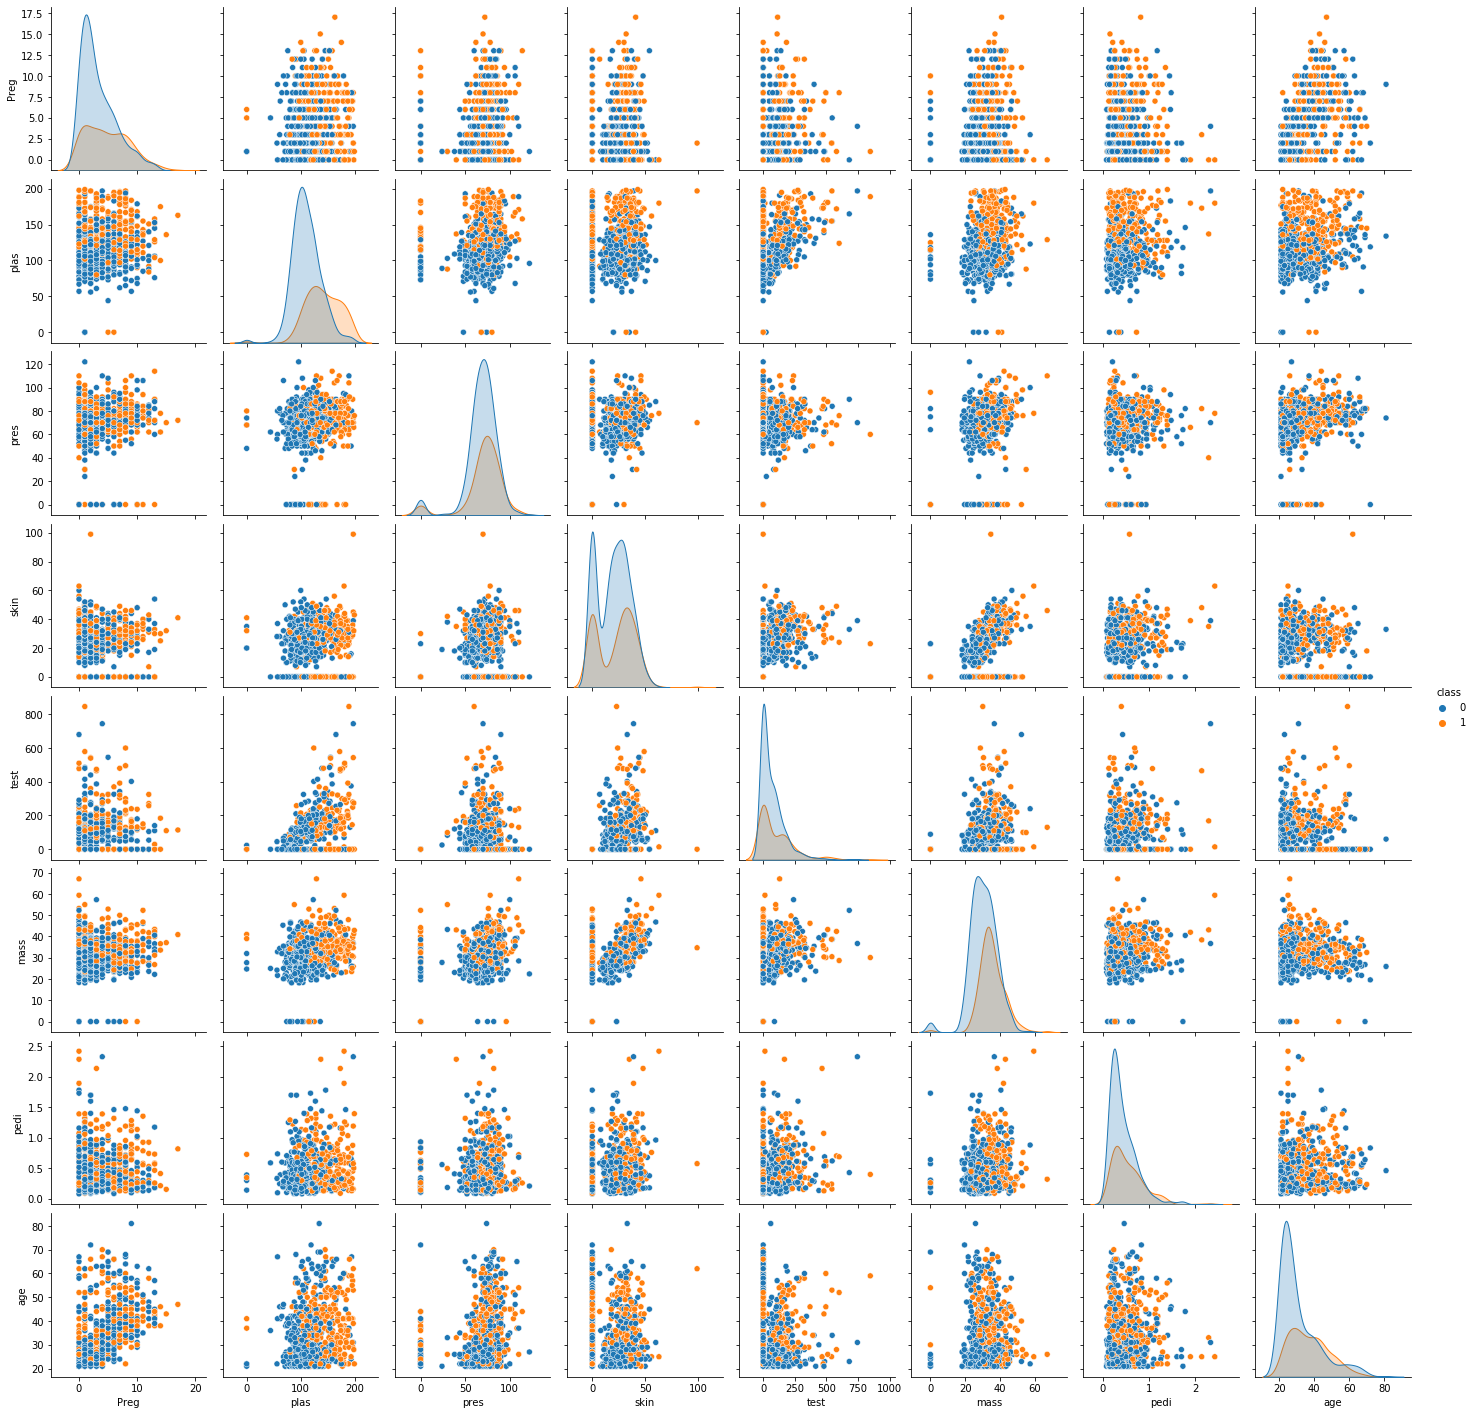

In [13]:
sns.pairplot(pima,hue="class",diag_kind='kde')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y=pima['class']
X=pima.drop("class",axis=1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model=LogisticRegression()

In [23]:
model.fit(X_train,y_train)

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [28]:
predict=model.predict(X_test)

In [25]:
model.score(X_test,y_test)

0.7489177489177489

In [32]:
from sklearn import metrics

In [33]:
from sklearn.metrics import classification_report

In [35]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       147
           1       0.70      0.55      0.61        84

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



In [31]:
from sklearn.metrics import confusion_matrix

In [48]:
print(metrics.confusion_matrix(y_test,predict))

[[127  20]
 [ 38  46]]


C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


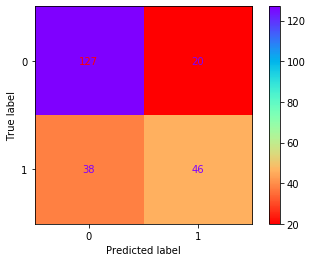

In [50]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test,cmap='rainbow_r')  
plt.show()